# Plotting data from NetCDF files

In [1]:
import MFT
import numpy as np
import numpy.ma as ma
import math
import matplotlib.pyplot as plt
import cartopy as cart
import cartopy.crs as ccrs
import xarray as xr
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots.declarative import (BarbPlot, ContourPlot, FilledContourPlot, MapPanel, PanelContainer)
import tqdm
from tqdm.autonotebook import trange, tqdm

/tmp/ipykernel_17506/2310202624.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange, tqdm


In [2]:
ds = xr.open_dataset('wrf_output.nc').metpy.parse_cf()

In [3]:
print(ds)

<xarray.Dataset>
Dimensions:    (lat: 99, lon: 99)
Coordinates:
  * lat        (lat) float32 32.76 32.85 32.95 33.04 ... 41.76 41.85 41.94 42.04
  * lon        (lon) float32 -79.25 -79.13 -79.0 -78.88 ... -67.27 -67.14 -67.02
    metpy_crs  object Projection: latitude_longitude
Data variables:
    UC         (lat, lon) float32 ...
    VC         (lat, lon) float32 ...
    U10        (lat, lon) float32 ...
    V10        (lat, lon) float32 ...
    SST        (lat, lon) float32 ...
    T2         (lat, lon) float32 ...
    Q2         (lat, lon) float32 ...
    SLP        (lat, lon) float32 ...
Attributes:
    Conventions:  None
    source_file:  wrfout_d02_2012-10-01_00:00:00
    title:        NCL generated netCDF file


In [4]:
u10 = ds['U10']
v10 = ds['V10']
print(u10)
print(v10)

<xarray.DataArray 'U10' (lat: 99, lon: 99)>
[9801 values with dtype=float32]
Coordinates:
  * lat        (lat) float32 32.76 32.85 32.95 33.04 ... 41.76 41.85 41.94 42.04
  * lon        (lon) float32 -79.25 -79.13 -79.0 -78.88 ... -67.27 -67.14 -67.02
    metpy_crs  object Projection: latitude_longitude
Attributes:
    stagger:      
    units:        m s-1
    description:  U at 10 M
    MemoryOrder:  XY 
    FieldType:    104
    remap:        remapped via ESMF_regrid_with_weights: Bilinear remapping
<xarray.DataArray 'V10' (lat: 99, lon: 99)>
[9801 values with dtype=float32]
Coordinates:
  * lat        (lat) float32 32.76 32.85 32.95 33.04 ... 41.76 41.85 41.94 42.04
  * lon        (lon) float32 -79.25 -79.13 -79.0 -78.88 ... -67.27 -67.14 -67.02
    metpy_crs  object Projection: latitude_longitude
Attributes:
    stagger:      
    units:        m s-1
    description:  V at 10 M
    MemoryOrder:  XY 
    FieldType:    104
    remap:        remapped via ESMF_regrid_with_weights: Bil

In [5]:
ds['wind_speed'] = mpcalc.wind_speed(ds['U10'], ds['V10'])
print(ds['wind_speed'])

<xarray.DataArray 'wind_speed' (lat: 99, lon: 99)>
<Quantity([[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan 1.9714457 1.90234   ...       nan       nan       nan]
 [      nan 2.075788  1.9514558 ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]], 'meter / second')>
Coordinates:
  * lat        (lat) float32 32.76 32.85 32.95 33.04 ... 41.76 41.85 41.94 42.04
  * lon        (lon) float32 -79.25 -79.13 -79.0 -78.88 ... -67.27 -67.14 -67.02
    metpy_crs  object Projection: latitude_longitude


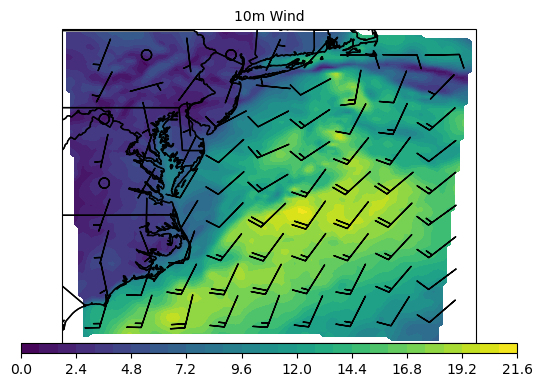

In [6]:
# Set attributes for plotting color-filled contours of wind speed
cfill = FilledContourPlot()
cfill.data = ds
cfill.field = 'wind_speed'
cfill.colorbar = 'horizontal'
cfill.plot_units = 'knot'

# Set attributes for plotting wind barbs
barbs = BarbPlot()
barbs.data = ds
barbs.field = ['U10', 'V10']
barbs.skip = (10, 10)
barbs.plot_units = 'knot'

# Set the attributes for the map and add our data to the map
panel = MapPanel()
panel.layers = ['states', 'coastline', 'borders']
panel.title = f'10m Wind'
panel.plots = [cfill, barbs]

# Set the attributes for the panel and put the panel in the figure
pc = PanelContainer()
pc.panels = [panel]

# Show plot
pc.show()


## Multi-Flux Testbed (MFT)

In [7]:
# MFT Parameters

CONV_CRIT = 0.00005     #convergence critereon (fractional change)  []  
CONVECT = 0.0          #convective parameter  
warn = 1                #warning are given     
eqv_neut = 0            #output winds are winds rather than equivalent neutral winds  
z_wanted = 10.0         #height to which winds, potential temp, and humidity are adjusted                                
flux_model = 9          #BVW model=0  
Qnet = 5.0
sst_prm = 0
z0_mom_prm = 0
z0_TQ_prm = 0
stable_prm = 0
wind_ang = 0
wave_ang = 0

dyn_in_prm = 0 # Wind speed, relative to the surface current, m/s
dyn_in_val2 = 0.0
ref_ht_wind = 10.0 # Height of the wind observations, m
CONVECT = 0 # Convective parameter. Recommended value between 0.7 and 1.25. For details see TOGA NOTES #4 (recommendation comes from no capillary waves)
air_moist_prm = 0 # Relative humidity, specific humidity
sfc_moist_prm = 1 # Relative humidity, fraction
sfc_moist_val = 0.98 # 98% assumed because of salinity obstructing evaporation
salinity = 34.9 / 1000.0 # Salinity, fraction, No salinity in dataset (global average)
ss_prm = 0 # Sea state parameterization, wind-wave stability parameter
ss_val = 1.0 # No sea state data in dataset, set to 1.0 for local equilibrium
ref_ht_tq = 2 # Height of temperature and humidity observations, m
sst_prm = 0 # Designates surface temperature as skin temperature?
astab = 1 # Atmospheric stability is calculated

In [9]:
# Calculate stress with MFT

#stress = np.ma.masked_all(shape=(nlat,nlon))
#ds['tau'] = ds['wind_speed']
ds['tau'] = xr.DataArray(
	data=None,
	dims=ds.dims,
	coords=ds.coords,
	attrs=dict(
		description="Wind stress",
		units="N m^-2",
		),
)

for (x,y), s in tqdm(np.ndenumerate(ds['tau'])):
	index = (x,y)

	if float(ds['SST'][index].values) is not np.nan:
		dyn_in_val = ds['wind_speed'][index].metpy.quantify().data.to('m/s').m
		pressure = ds['SLP'][index].metpy.quantify().data.to('Pa').m # Atmospheric surface pressure, Pa (converted from hPa in dataset)
		air_moist_val = ds['Q2'][index].metpy.quantify().data.to('kg/kg').m # (converted from g/kg to fraction)
		t_air = ds['T2'][index].metpy.quantify().data.to('degC').m # Air temperature at the reference height of the thermometer and humidity sensor, C
		t_skin =ds['SST'][index].metpy.quantify().data.to('degC').m # skin tempearture, C
		
		pass_by_ref_params = {'shf':0, 'lhf':0, 'tau':[0,0], 'u_star':[0,0], 't_star':0, 'q_star':0, 'z_over_L':0, 'wave_age':0, 'dom_phs_spd':0,
			'h_sig':0, 'ww_stab':0, 'zo_m':[0, 0], 'u_at_z':0, 't_at_z':0, 'q_at_z':0}

		count = MFT.ht_adj_( dyn_in_prm, dyn_in_val, dyn_in_val2, CONVECT, CONV_CRIT,
			pressure, air_moist_prm, air_moist_val, sfc_moist_prm, sfc_moist_val,
			salinity, ss_prm, ss_val, t_air, sst_prm, t_skin, ref_ht_wind, ref_ht_tq,
			z_wanted, astab, eqv_neut, Qnet, warn, flux_model, z0_mom_prm, z0_TQ_prm, stable_prm,
			pass_by_ref_params )
		if count > 0:
			ds['tau'][index] = pass_by_ref_params["tau"][0]

0it [00:00, ?it/s]

In [ ]:
# Set attributes for plotting color-filled contours of wind speed
cfill = FilledContourPlot()
cfill.data = ds
cfill.field = 'SST'
cfill.colorbar = 'horizontal'
cfill.plot_units = 'degC'

# Set attributes for plotting wind barbs
barbs = BarbPlot()
barbs.data = ds
barbs.field = ['U10', 'V10']
barbs.skip = (10, 10)
barbs.plot_units = 'knot'

# Set the attributes for the map and add our data to the map
panel = MapPanel()
panel.layers = ['states', 'coastline', 'borders']
panel.title = f'10m Wind'
panel.plots = [cfill, barbs]

# Set the attributes for the panel and put the panel in the figure
pc = PanelContainer()
pc.panels = [panel]

# Show plot
pc.show()